# EXPERIMENT NO 8

## Random Forest Model on the MNIST data.


### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import cross_val_score

## READING THE DATASET

In [2]:
train = pd.read_csv(
    '/DOCUMENTS/COLLEGE/CLASSES/EXPERIMENT_NO_8/train.csv/train.csv')

test = pd.read_csv(
    '/DOCUMENTS/COLLEGE/CLASSES/EXPERIMENT_NO_8/test.csv/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Seperate the target and independant variables
df_x = train.iloc[:, 1:]
df_y = train.iloc[:, 0]

In [6]:
# function to print dataset


def print_image(row, df):
    temp = df.iloc[row, :].values
    temp = temp.reshape(28, 28).astype('uint8')
    plt.imshow(temp)

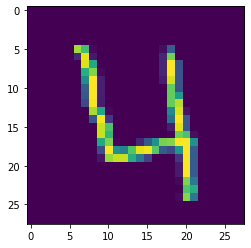

In [7]:
print_image(3, df_x)

### EXPLORARTORY DATA ANALYSIS (EDA)

In [8]:
# Check the frequency of each number
df_y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

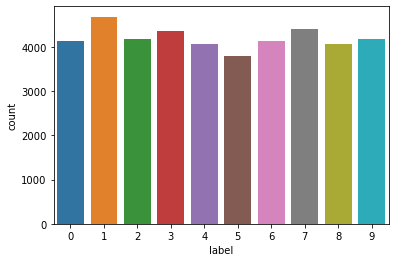

In [9]:
sns.countplot(df_y)

#### UNDERSTANDING THE TEST DATA

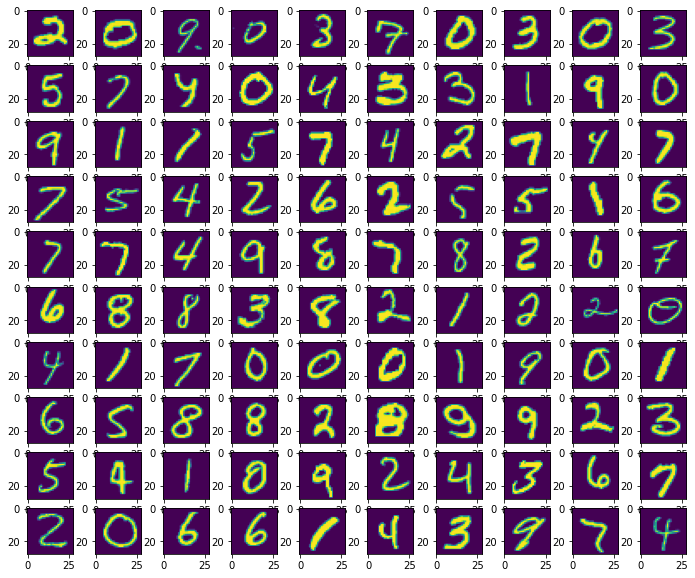

In [10]:
plt.figure(figsize=(12, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    print_image(i, test)

### MODEL PREPRATION

In [11]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x,
                                                    df_y,
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


#### MODEL CREATION

In [12]:
# training random Forest
rf = RandomForestClassifier(n_estimators=100,
                            bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            max_depth=None,
                            max_features='auto',
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            n_jobs=1,
                            oob_score=False,
                            random_state=None,
                            verbose=0,
                            warm_start=False)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1)

In [13]:
pred = rf.predict(X_test)
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.96       860
           3       0.96      0.94      0.95       863
           4       0.96      0.96      0.96       827
           5       0.96      0.96      0.96       756
           6       0.97      0.99      0.98       841
           7       0.97      0.96      0.97       899
           8       0.95      0.95      0.95       768
           9       0.95      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Report
[[793   0   0   2   2   3   6   0   7   0]
 [  0 947   7   1   1   2   1   0   2   0]
 [  6   1 834   5   3   0   3   4   4   0]
 [  3   1  16 813   0   7   1   9   8   5]
 [  2   2   0   0 795   0   5 

### USING THE CROSS VALIDATION

In [14]:
# Cross validation
rf = RandomForestClassifier(n_estimators=100)
rf.fit(df_x, df_y)
score = cross_val_score(rf, df_x, df_y)
print(np.mean(score))

0.963904761904762


In [15]:
# Predicting on test data
pred = rf.predict(test)

In [16]:
pred = pd.Series(pred, name="Label")
pd.concat([pd.Series(range(1, 28001), name="ImageId"), pred], axis=1)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


# ----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----